In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

In [2]:
data = dp.getXYdata_wXYerr('data/NGC5533-rot-data_fmt.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

In [3]:
def f(r,M,rc,rho00,c,d):
    return np.sqrt(nf.bh_v(r,M)**2 + nf.h_v(r,rc,rho00)**2 + c*nf.b_v(r,load=True)**2 + d*nf.d_v(r,load=True)**2)
#Next: Spline bulge, make that a function, give prefactor
# - call file, get vector
# - spline fit vector
# - calculate over spline
# - prefactor in sum
#Probably similar thing for disk
#Eventually fit for n?

#Cache/memoize
# - number of iterations -> number of function calls
# - 40 calls was reasonable

#Save functions/vectors at certain points rather than individual values

In [37]:
#Setup
weighdata = 1/v_err1
l_mod = lm.Model(f)
params = l_mod.make_params()
params.add('M', value=nf.Mbh_def, min=0) #Mass
params.add('c', value=1, min=0)          #Contributions should all add
params.add('d', value=1, min=0)
params.add('rc', value=nf.h_rc, min=0)   #Radius (magnitude)
params.add('rho00', value=nf.h_rho00, min=0) #Density

#Do fit
l_fit = l_mod.fit(v_dat,params,r=r_dat,weights=weighdata)

#Define Stuff
l_dict = l_fit.best_values
l_M = l_dict['M']
l_rc = l_dict['rc']
l_rho00 = l_dict['rho00']
l_c = l_dict['c']
l_d = l_dict['d']

l_curve = np.sqrt(nf.bh_v(r_dat,l_M)**2 + nf.h_v(r_dat,l_rc,l_rho00)**2 + l_c*nf.b_v(r_dat,load=True)[1]**2 + l_d*nf.d_v(r_dat,load=True)**2)
    
d_curve = l_d*nf.d_v(r_dat,load=True) #Disk only
nodisk = np.sqrt(nf.bh_v(r_dat,l_M)**2 + nf.h_v(r_dat,l_rc,l_rho00)**2 + l_c*nf.b_v(r_dat,load=True)[1]**2)

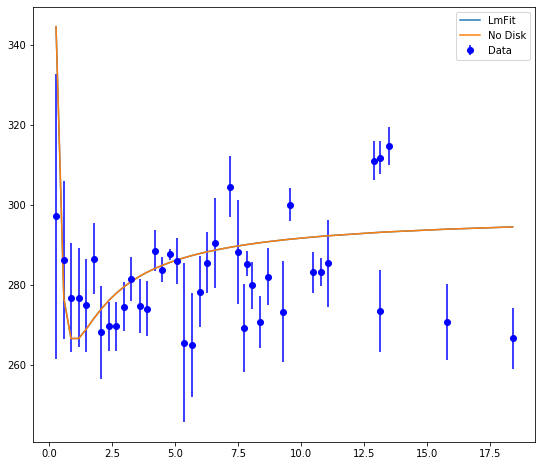

In [38]:
fig = plt.figure(figsize=(9.0,8.0))

plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.plot(r_dat,l_curve,label='LmFit')
#plt.plot(r_dat,d_curve,label='Disk Only')
plt.plot(r_dat,nodisk,label='No Disk')

plt.legend()
plt.show()

In [39]:
l_fit